Reference：https://www.kaggle.com/code/youssefabdelmottaleb/lungs-cancer-classification-ml-dl

## Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

## Data Review

In [2]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv", sep=",",encoding="UTF-8")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(1000, 26)

In [4]:
# getting information about columns using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
#Check types for all the columns using dtypes
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [6]:
# getting statistical information for every column in dataset by iterating over the columns by a for loop and getting these data using describe() function
for column in df.columns:
    print(df[column].describe())
    print("\n----------------------------\n")

count    1000.000000
mean      499.500000
std       288.819436
min         0.000000
25%       249.750000
50%       499.500000
75%       749.250000
max       999.000000
Name: index, dtype: float64

----------------------------

count     1000
unique    1000
top         P1
freq         1
Name: Patient Id, dtype: object

----------------------------

count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: Age, dtype: float64

----------------------------

count    1000.000000
mean        1.402000
std         0.490547
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Gender, dtype: float64

----------------------------

count    1000.0000
mean        3.8400
std         2.0304
min         1.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         8.0000
Name: Air Pollution, dtype: float64

--------

In [7]:
# trying to know if there is any cell in the sheet that doesn't contain any value by using isnull() and any() functions if there is the output will be true false otherwise
df.isnull().any()

index                       False
Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

##### there is no missing data found in the sheet

In [8]:
#checking duplicates
df.duplicated().sum()

0

##### No duplicates are found

In [9]:
for column in df.columns:
    print(df[column].value_counts())


0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: index, Length: 1000, dtype: int64
P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: Age, dtype: int64
1    598
2    402
Name: Gender, dtype: int64
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: Air Pollution, dtype: int64
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: Alcohol use, dtype: int64
7    405
4    133
5    111
6    110
3    101
2     70
1     60
8   

## EDA & Data Preprocessing

In [10]:
# giving labels to our values
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

<BarContainer object of 1000 artists>

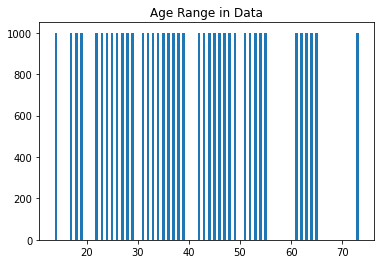

In [11]:
plt.title("Age Range in Data")
plt.bar(df['Age'], height=df.shape[0],width=.5)

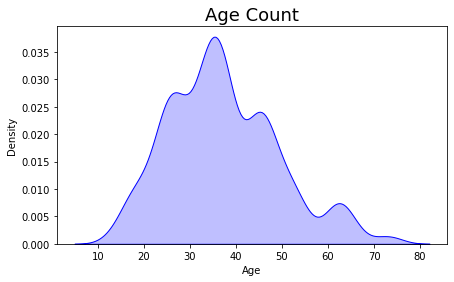

In [12]:
plt.figure(figsize = (7,4))
sns.kdeplot(df.Age, shade = True, color = "b")
plt.title("Age Count", fontsize = 18)
plt.show()

In [13]:
df1 = df.drop(["Level","Patient Id","index"],axis=1)

#### Correlated features

<AxesSubplot:>

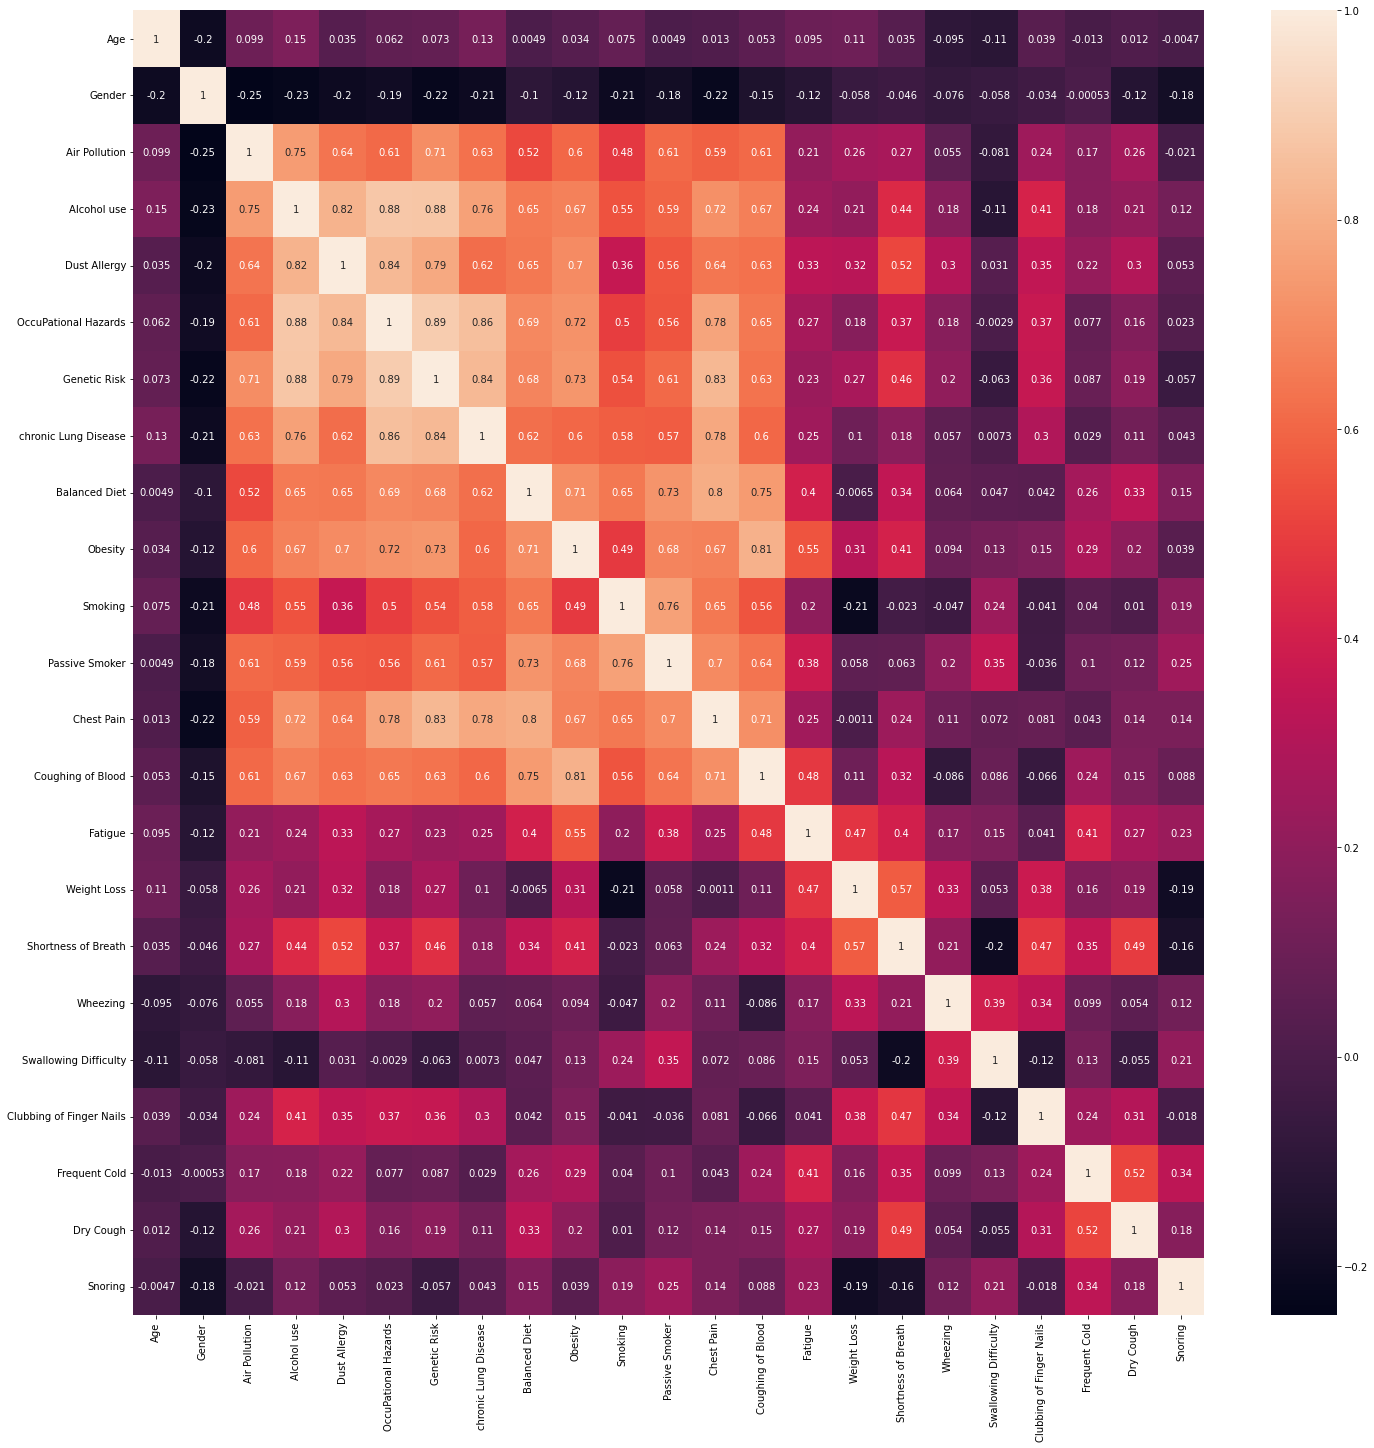

In [14]:
plt.subplots(figsize = (24, 24))
sns.heatmap(df1.corr(), annot = True)

### Overview

- It also shows us that obesity, air pollution, balanced diet, cough of blood, passive smoker is strong correlated with lung caner, therefore we should be alert when these factors occur to us.

In [15]:
correlationC=[]
for column in df1.columns :
    for columnC in df1.columns:
        a = df1[column].corr(df1[columnC])
        if a > 0.8 and (column != columnC) :
            if a in correlationC:
                continue
            else :
                correlationC.append(a)         
                print (column +" column has high correlation with column "+ columnC)
                print(df1[column].corr(df1[columnC]))
                print("*******************************")

Alcohol use column has high correlation with column Dust Allergy
0.8186435195099228
*******************************
Alcohol use column has high correlation with column OccuPational Hazards
0.8787859206801713
*******************************
Alcohol use column has high correlation with column Genetic Risk
0.8772098877053743
*******************************
Dust Allergy column has high correlation with column Alcohol use
0.8186435195099229
*******************************
Dust Allergy column has high correlation with column OccuPational Hazards
0.835859771456722
*******************************
OccuPational Hazards column has high correlation with column Genetic Risk
0.8930485226784656
*******************************
OccuPational Hazards column has high correlation with column chronic Lung Disease
0.8582838533909174
*******************************
Genetic Risk column has high correlation with column OccuPational Hazards
0.8930485226784657
*******************************
Genetic Risk column h

In [16]:
correlationC.sort()
correlationC.reverse()
correlationC

[0.8930485226784657,
 0.8930485226784656,
 0.8787859206801713,
 0.8772098877053743,
 0.8582838533909174,
 0.836230827381165,
 0.8362308273811649,
 0.835859771456722,
 0.8317508263736837,
 0.8186435195099229,
 0.8186435195099228,
 0.8148047650547855]

### Decoding

#### the discrete column (Level) from the dataset needs to be repaired :

In [17]:
df["Gender"] = df["Gender"].replace([1,2],["Female","Male"])
df["Air Pollution"] = df["Air Pollution"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Dust Allergy"] = df["Dust Allergy"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["OccuPational Hazards"] = df["OccuPational Hazards"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Genetic Risk"] = df["Genetic Risk"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["chronic Lung Disease"] = df["chronic Lung Disease"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Fatigue"] = df["Fatigue"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Weight Loss"] = df["Weight Loss"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Shortness of Breath"] = df["Shortness of Breath"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Wheezing"] = df["Wheezing"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Swallowing Difficulty"] = df["Swallowing Difficulty"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Clubbing of Finger Nails"] = df["Clubbing of Finger Nails"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Frequent Cold"] = df["Frequent Cold"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Dry Cough"] = df["Dry Cough"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Snoring"] = df["Snoring"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Obesity"] = df["Obesity"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Passive Smoker"] = df["Passive Smoker"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])


In [18]:
df["Passive Smoker"].value_counts()

low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: Passive Smoker, dtype: int64

In [19]:
df.Level.value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

<AxesSubplot:title={'center':'Level Column Values'}, ylabel='Level'>

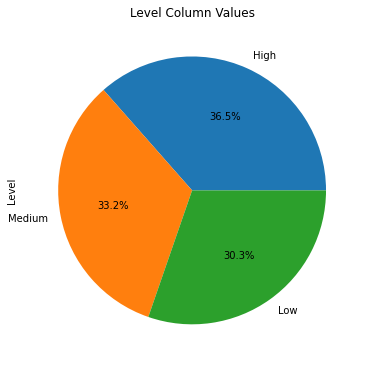

In [20]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Level"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

##### target column is balanced

#### How is OccuPational Hazards is affected by Genetic Risk ?

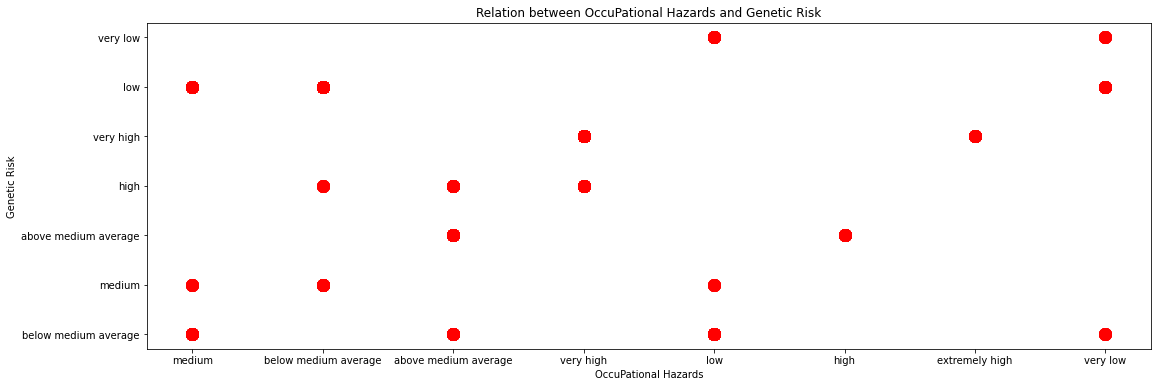

In [21]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df["OccuPational Hazards"],df["Genetic Risk"],alpha=0.7,c="red",linewidths=7)

##### There's a postive correlation between them as people with high genetic risk are having high occupational hazards

#### Who are more susceptible to disease ?

[Text(0.5, 1.0, 'Relation Between OccuPational Hazards and Gender')]

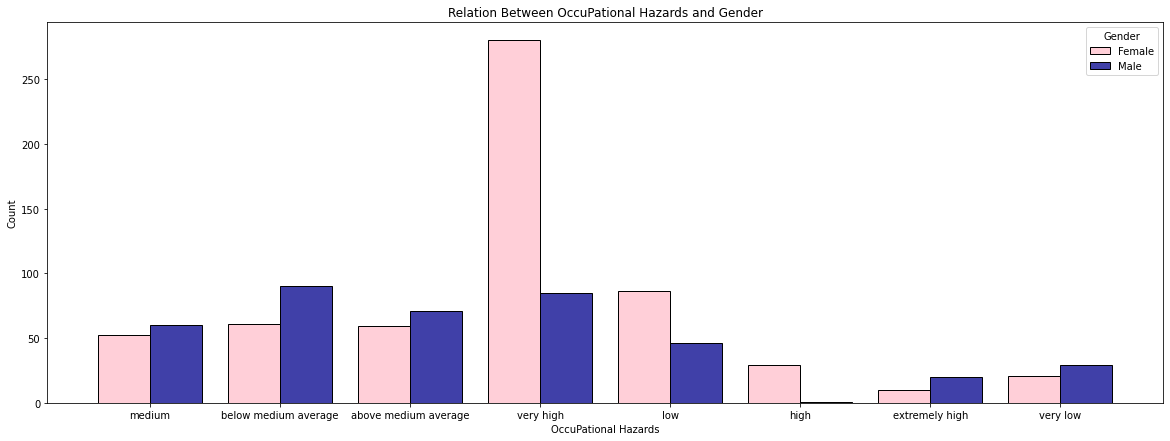

In [22]:
plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x=df["OccuPational Hazards"], hue=df["Gender"], multiple="dodge", shrink=.8,palette=["pink","darkblue"]).set(title='Relation Between OccuPational Hazards and Gender')

##### females are more likly to get lungs disease with high ratio compared to men

In [23]:
df.Gender.value_counts()

Female    598
Male      402
Name: Gender, dtype: int64

#### How Many Smoker We Have & How Much They Smoke ?

<AxesSubplot:title={'center':'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

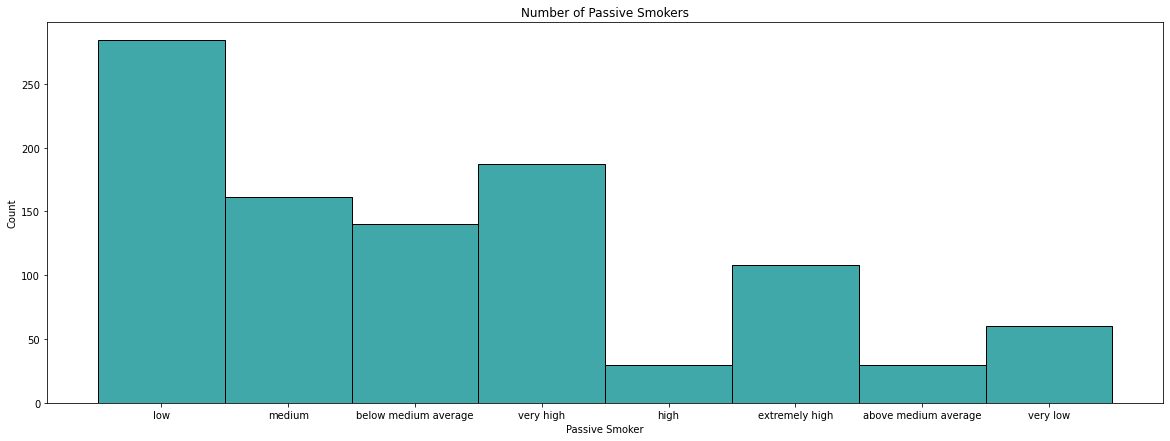

In [24]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=df, x=df["Passive Smoker"],color= "darkcyan")

##### Most Passive Smokers are Smoking in low values nearly 300 Smoker

#### Who is drinking the most alcohols ?

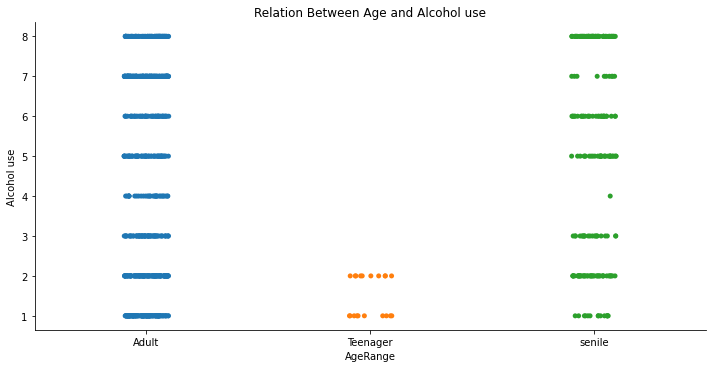

In [25]:
df3= df.copy()

df3['AgeRange'] = None
df3.loc[(df3['Age'] > 14) & (df3["Age"] < 18), 'AgeRange'] = "Teenager"
df3.loc[(df3['Age'] > 18) & (df3["Age"] < 45), 'AgeRange'] = "Adult"
df3.loc[(df3['Age'] > 45) & (df3["Age"] < 74), 'AgeRange'] = "senile"


sns.catplot(data=df3, x="AgeRange", y="Alcohol use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

##### Adults are the most people to drink alcohols ( 18 < Adults < 45 )

#### What is the Relation Genetic Risk and chronic Lung Disease ?

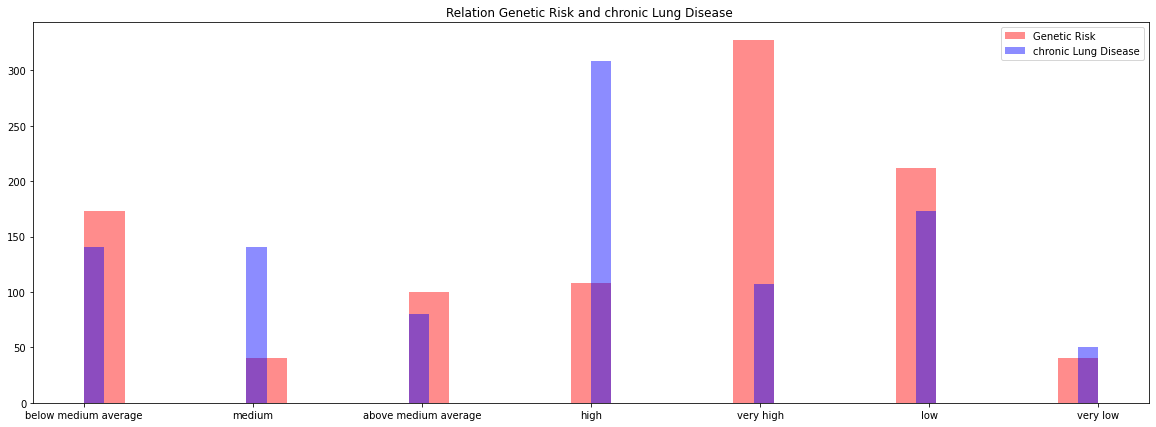

In [26]:
plt.subplots(figsize=(20, 7))

plt.hist(df['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")

  
plt.legend(['Genetic Risk', 
            'chronic Lung Disease'])

##### Seems like Genetic Risk has no effect on chronic Lung Disease

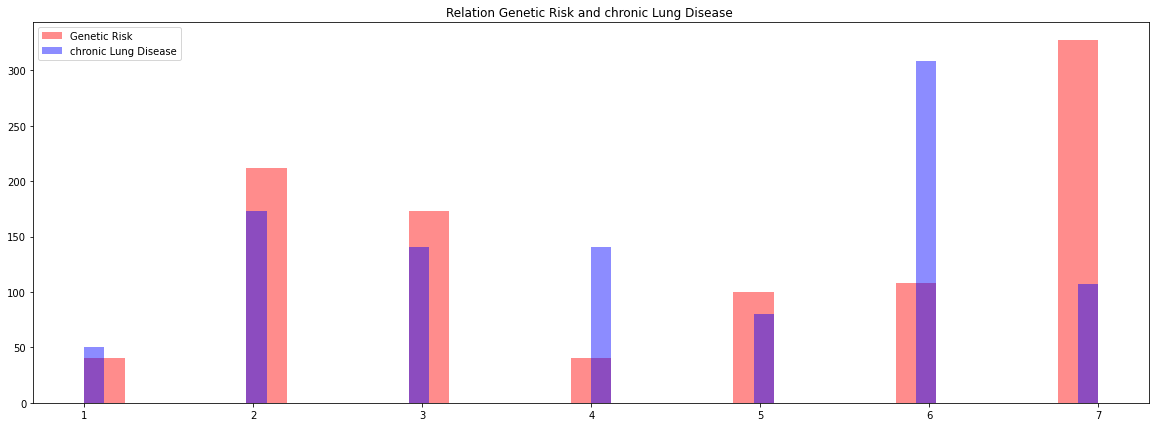

In [27]:
df6 = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv", sep=",",encoding="UTF-8")

plt.subplots(figsize=(20, 7))

plt.hist(df6['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df6['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")
  
plt.legend(['Genetic Risk', 
            'chronic Lung Disease'])

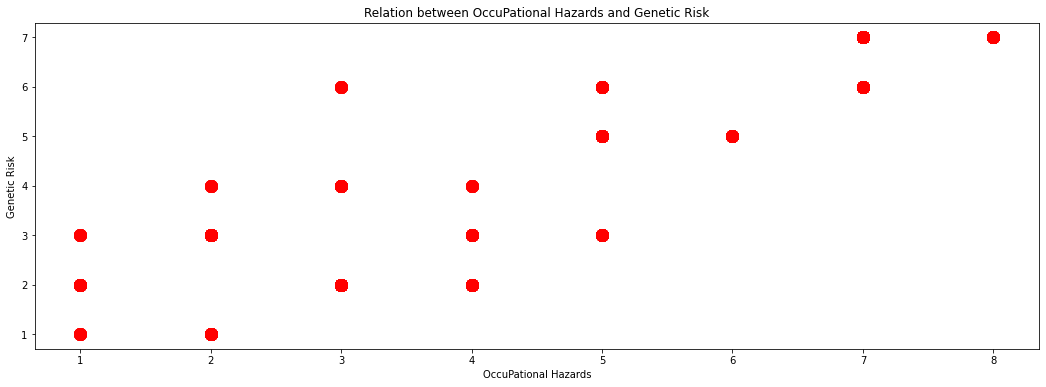

In [28]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df6["OccuPational Hazards"],df6["Genetic Risk"],alpha=0.7,c="red",linewidths=7)

#### How is Obesity affecting Coughing of blood level ?

<AxesSubplot:title={'center':'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

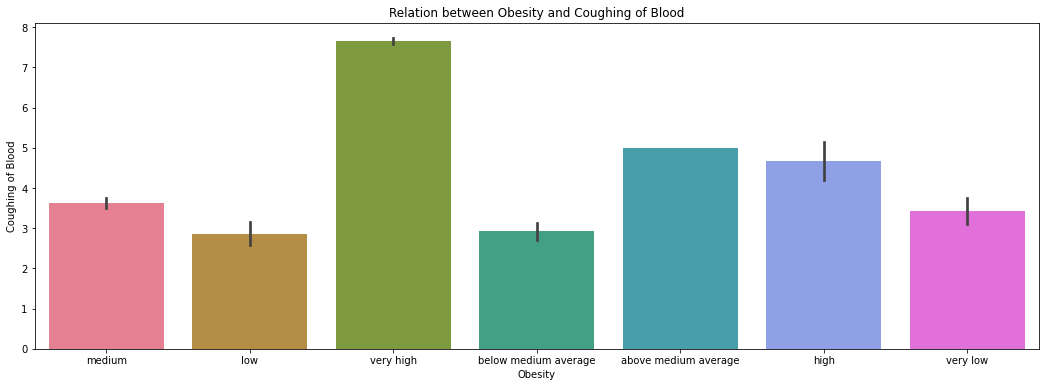

In [29]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df, x="Obesity", y="Coughing of Blood",palette="husl")

##### as expected people with high obesity tends to have more coughing of blood

<AxesSubplot:title={'center':'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

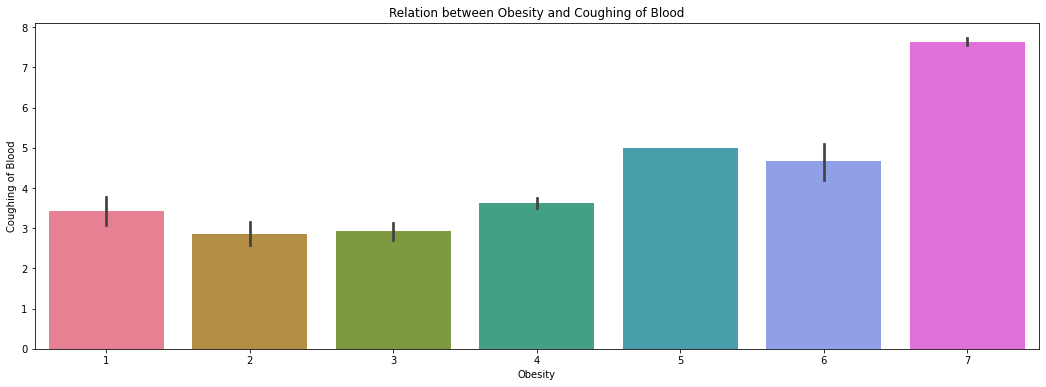

In [30]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df6, x="Obesity", y="Coughing of Blood",palette="husl")

#### is there's any outliers in the dataset ?

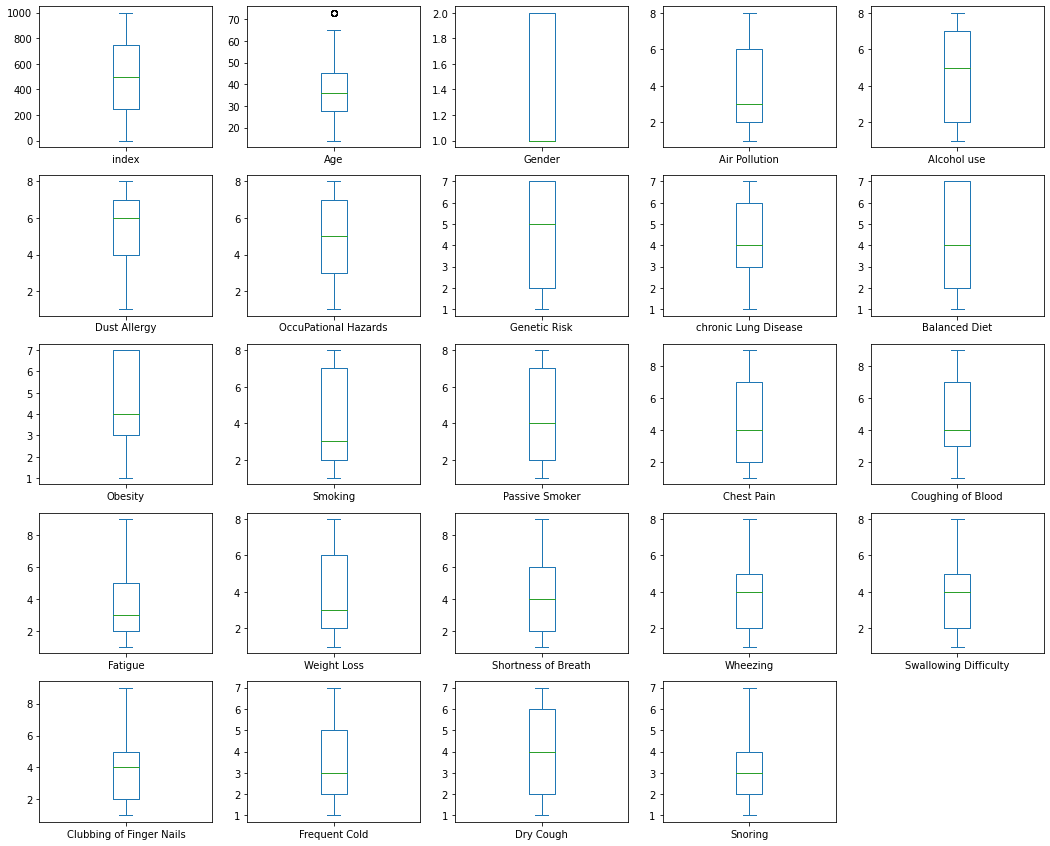

In [31]:
# drawing a box plots for all columns

df6.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

<AxesSubplot:title={'center':'Age Column Box Plot'}, xlabel='Age'>

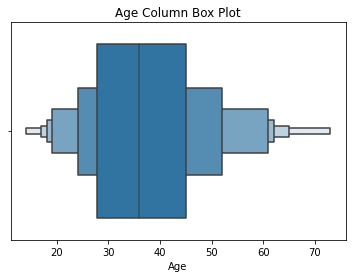

In [32]:
plt.title("Age Column Box Plot")
sns.boxenplot(df.Age)

##### No outliers found in it

In [33]:
# using df6 for later classification
df6.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

### Encoding

In [34]:
# making an object named le from LabelEncoder Class
le = LabelEncoder()

# transforming the datatype
df6['Level'] = le.fit_transform(df6['Level'])
df6['Patient Id'] = le.fit_transform(df6['Patient Id'])

In [35]:
df6.dtypes

index                       int64
Patient Id                  int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

### Train Test Split

In [36]:
# Split data between predictors and output variable
x = df6.drop(["Level","Patient Id","index"],axis=1).values
y = df.Level.values

In [37]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train

array([[28,  2,  1, ...,  7,  7,  5],
       [53,  1,  6, ...,  1,  7,  6],
       [28,  2,  1, ...,  7,  7,  5],
       ...,
       [36,  2,  2, ...,  3,  2,  3],
       [49,  1,  6, ...,  6,  7,  2],
       [49,  1,  6, ...,  6,  7,  2]])

In [39]:
x_test

array([[48,  2,  1, ...,  1,  2,  1],
       [62,  1,  6, ...,  3,  4,  2],
       [22,  1,  6, ...,  3,  4,  2],
       ...,
       [28,  1,  6, ...,  4,  5,  3],
       [44,  1,  2, ...,  3,  2,  3],
       [46,  2,  1, ...,  7,  7,  5]])

In [40]:
y_train

array(['Medium', 'High', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Medium', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'High', 'Low',
       'Medium', 'High', 'High', 'High', 'Medium', 'High', 'High', 'High',
       'Low', 'High', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'High', 'High', 'Medium', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'High', 'Medium', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'Low', 'High',
       'Low', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High', 

In [41]:
y_test

array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Medium',
       'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium

#### Scalling the Data using Standard Scaler

In [42]:
# Scale train/ test predictors based on training data
s_scaler = StandardScaler().fit(x_train)
x_train_scaled = s_scaler.transform(x_train)
x_test_scaled = s_scaler.transform(x_test)

In [43]:
# Results summarizer function (scores, confusion matrix) for classification results
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    
    plt.figure(figsize=(10,8))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

#### Logistic Regression

In [44]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [45]:
lr.score(x_train , y_train)

0.995

In [46]:
lr.score(x_test , y_test)

0.995

In [47]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


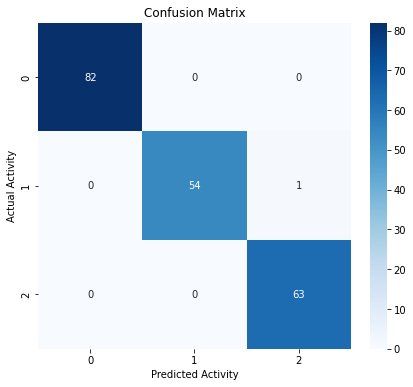

In [48]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

#print(f'Accuracy Score: ' + '{:.4%}'.format(acc))


#### KNN

In [49]:
knn=KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
knn.score(x_train,y_train)

0.99875

In [52]:
knn.score(x_test,y_test)

0.995

In [53]:
y_pred=knn.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


In [54]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn = knn2.predict(x_test_scaled)

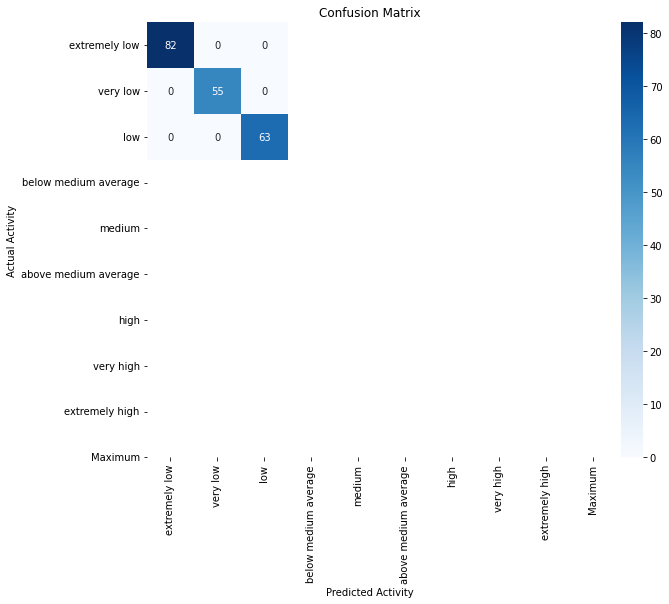

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [55]:
resultsSummarizer(y_test, y_pred_knn)

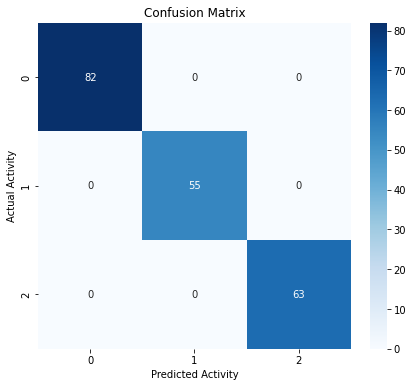

In [56]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()


#### Random Forest Classifer

In [57]:
rfst = RandomForestClassifier(n_estimators=10,random_state=42)
rfst.fit(x_train_scaled, y_train)
y_pred_rfst = rfst.predict(x_test_scaled)

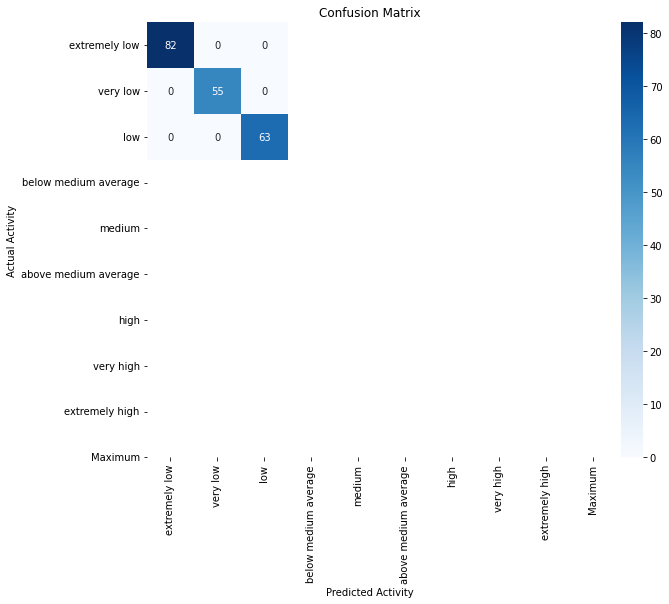

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [58]:
resultsSummarizer(y_pred_rfst, y_test)

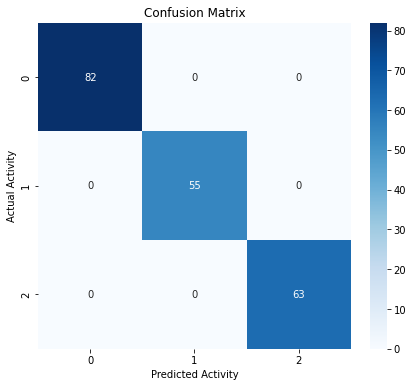

In [59]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_rfst)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

#### Grid Search

In [60]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train[:1000],y_train[:1000])
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
Best C 0.12
Best Gamma 0.02


### Modelling using SVM kernel

#### Linear

In [61]:
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
lin.fit(x_train, y_train)

SVC(C=0.12, gamma=0.02, kernel='linear')

In [62]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



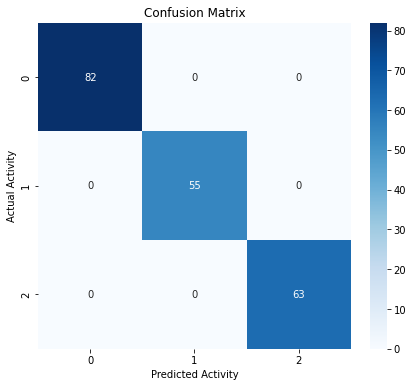

In [63]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_Linear)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

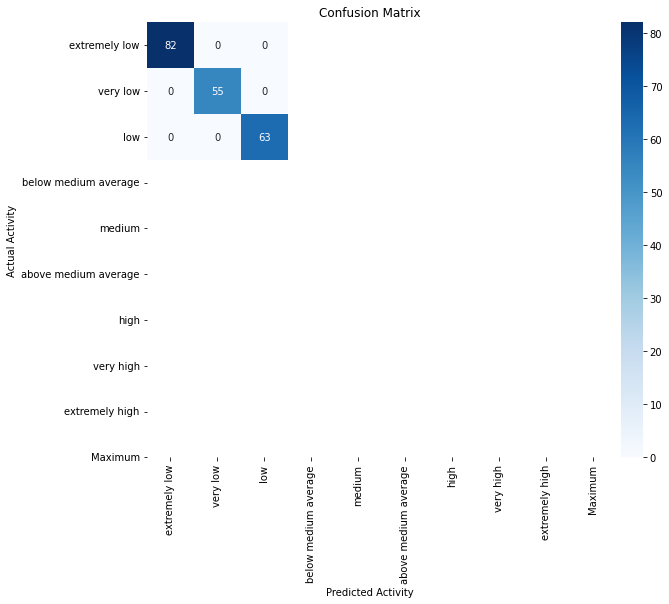

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [64]:
resultsSummarizer(y_pred_Linear, y_test)

#### RBF

In [65]:
rbf = SVC(kernel='rbf',C=1,gamma=0.6)
rbf.fit(x_train, y_train)

y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

        High       1.00      0.99      0.99        82
         Low       1.00      0.96      0.98        55
      Medium       0.95      1.00      0.98        63

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200



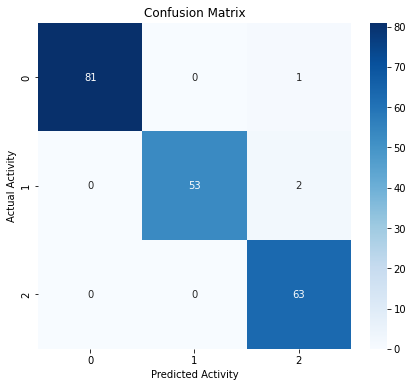

In [66]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_RBF)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

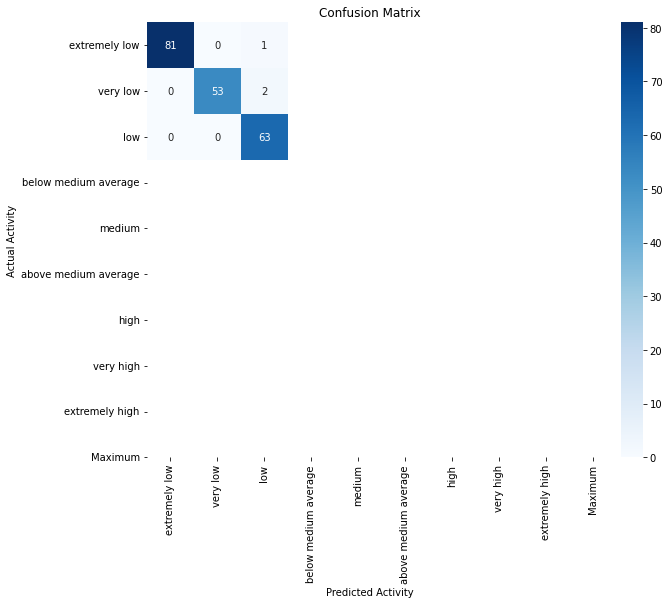

Accuracy Score: 98.5000%
Precision Score: 98.4848%
Recall Score: 98.3814%
F_1 Score: 98.4030%


In [67]:
resultsSummarizer(y_test, y_pred_RBF)

### Deep Learning Model

In [68]:
df10 = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv", sep=",",encoding="UTF-8")

In [69]:
df10.Level = df10.Level.replace("Low", 0)
df10.Level = df10.Level.replace("Medium", 1)
df10.Level = df10.Level.replace("High", 2)
df10.Level = df10.Level.astype("int64")

In [70]:
x = df10.drop(["Level","Patient Id","index"], axis = 1)
y = pd.get_dummies(df["Level"])

In [71]:
model = Sequential()
model.add(Dense(8, activation = "relu", input_dim = x.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
#earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=32)
dlModel = model.fit(x, y, epochs = 200, validation_split = 0.3)

2022-12-21 22:25:32.502785: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-21 22:25:32.696936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
22/22 [==============================] - 1s 14ms/step - loss: 1.1723 - accuracy: 0.4100 - val_loss: 1.0186 - val_accuracy: 0.4667
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 1.0602 - accuracy: 0.4186 - val_loss: 0.9608 - val_accuracy: 0.5300
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9879 - accuracy: 0.4914 - val_loss: 0.8889 - val_accuracy: 0.5733
Epoch 4/200
22/22 [==============================] - 0s 7ms/step - loss: 0.9552 - accuracy: 0.5100 - val_loss: 0.8586 - val_accuracy: 0.6233
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.9271 - accuracy: 0.5571 - val_loss: 0.7927 - val_accuracy: 0.6533
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.8684 - accuracy: 0.5743 - val_loss: 0.7391 - val_accuracy: 0.6800
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.8423 - accuracy: 0.5971 - val_loss: 0.7079 - val_accuracy: 0.6933
Epoch 8/200


In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


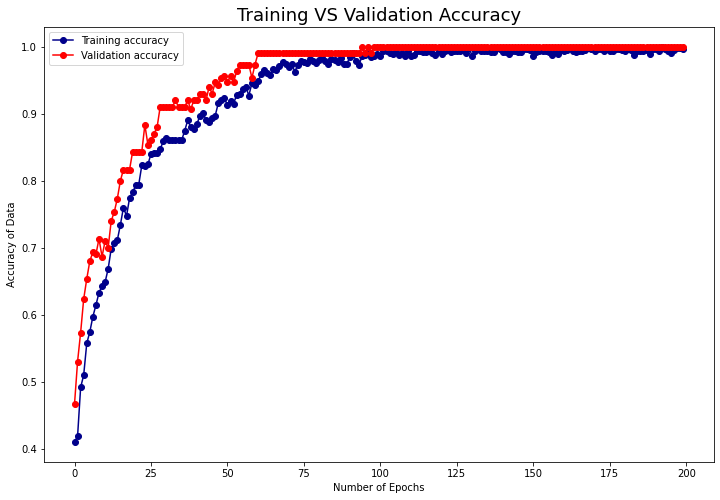

In [73]:
# drawing a plot to see the accuracy of the data
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Data")
plt.plot(dlModel.history["accuracy"], label = "Training accuracy", marker = "o", color = "darkblue",)
plt.plot(dlModel.history["val_accuracy"],label = "Validation accuracy", marker = "o",color = "r",)
plt.title("Training VS Validation Accuracy", fontsize = 18)
plt.legend()
plt.show()

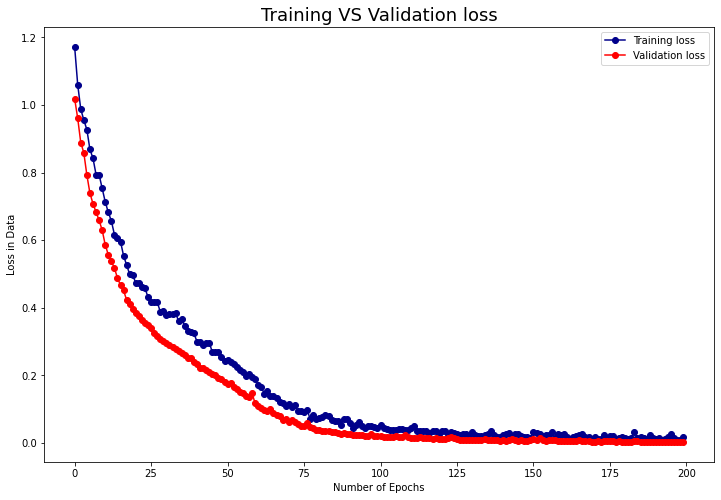

In [74]:
# drawing a plot to see loss data
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss in Data")
plt.plot(dlModel.history["loss"], label= "Training loss", marker = "o", color = "darkblue",)
plt.plot(dlModel.history["val_loss"], label= "Validation loss", marker = "o", color = "r",)
plt.title("Training VS Validation loss", fontsize = 18)
plt.legend()
plt.show()

### Thank You and See You in Other Datasets